## 분류용 선형 모델

`결정 경계`를 입력의 선형 함수로 사용하여 분류

선형 모델을 학습시키는 알고리즘은 크게 두 방법으로 구분

- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

### 로지스틱 회귀
### 서포트 벡터 머신(SVM)

C:\Users\82106\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


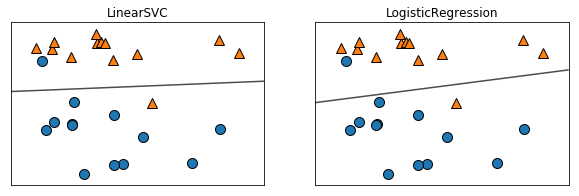

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import mglearn
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
ax

### SVC와 로지스틱 회귀모델의 결정경계
이 두 모델은 L2규제를 사용

규제의 강도를 결정하는 매개변수는 `C`

`C`가 높아질 수록 규제가 감소

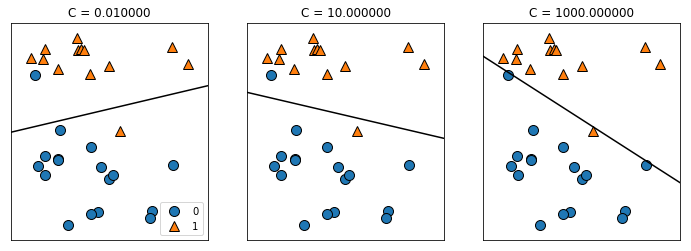

In [7]:
mglearn.plots.plot_linear_svc_regularization()

규제가 강해진 모델(왼쪽)은 비교적 수평에 가까운 결정 경계

가장 오른쪽 모델은 모든 데이터 포인트를 정확하게 분류하려고 애썼지만, 일반화가 잘 안됨(과대 적합)

#### 유방암 데이터셋을 사용한 LogisticRegression

In [12]:
from sklearn.datasets import load_breast_cancer
import sklearn
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [13]:
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
logreg.score(X_train, y_train)

C:\Users\82106\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9553990610328639

In [14]:
logreg.score(X_test, y_test)

0.958041958041958

In [15]:
# train, test 성능이 비슷하므로 과소적합인 것 같다.
# 제약을 좀 더 풀어주기 위해 C를 증가시켜본다.

In [16]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
logreg100.score(X_train, y_train)

C:\Users\82106\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.971830985915493

In [17]:
logreg100.score(X_test, y_test)

0.965034965034965

### 다중 클래스 분류용 선형 모델
로지스틱 회귀만 제외하고, 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원

즉, 다중 클래스를 지원하지 않음.

이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장 시켜야 하는데, `일대다`방법을 사용.

각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴.

결국 클래스의 수만큼 이진 분류 모델이 만들어지고 예측시 모든 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 함.

In [18]:
# 세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식 적용해보기
# 이 데이터셋은 2차원이며 각 클래스의 데이터는 정규분포(가우시안 분포)를 따름

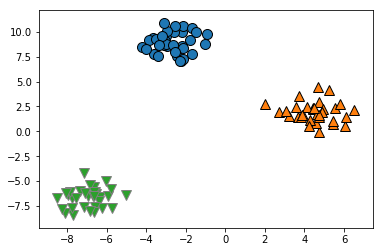

In [19]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [20]:
# 위 데이터셋으로 LinearSVC 분류기를 훈련

linear_svm = LinearSVC().fit(X, y)
linear_svm.coef_.shape

(3, 2)

In [23]:
linear_svm.intercept_.shape

(3,)

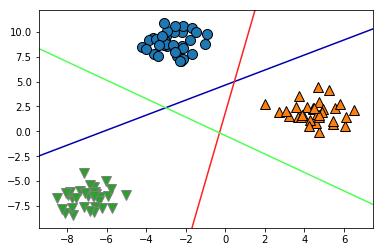

In [31]:
# 세 개의 이진 분류기가 만드는 경계를 시각화
import numpy as np
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) 

훈련 데이터의 클래스 0에 속한 모든 포인트는 클래스 0을 구분하는 직선 위에, 즉 이진 분류기가 만든 클래스 0 지역에 있음

## conclustion
선형 모델의 주요 매개 변수
- 회귀 모델: alpha -> 값이 클 수록 모델이 단순해짐
- LinearSVC, LogisticRegression: C -> 값이 작을 수록 모델이 단순해짐

##### L1, L2의 선택
- 중요한 특성이 많지 않을 시: L1
- else: L2

##### 선형 모델의 장단점
선형 모델은 학습 속도가 빠르고 예측도 빠름

매우 큰 데이터셋과 희소한 데이터셋에서도 잘 작동

선형 모델은 샘플에 비해 특성이 많을 때 잘 작동

다른 모델로 학습하기 어려운 매우 큰 데이터 셋에도 선형 모델을 많이 사용

`but` 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋음

In [33]:
!git add .
!git commit -m "Logistic Regression & SVM"
!git push origin master

[master a9a6e3b] Logistic Regression & SVM
 2 files changed, 452 insertions(+), 3 deletions(-)
 create mode 100644 #2 supervised learning/Logistic Regression & SVM.ipynb


To https://github.com/Tedhoon/scikit-learn.git
   4c4ac71..a9a6e3b  master -> master
